In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

In [18]:
df = pd.read_csv(r'C:\Users\aqngu\Desktop\Gleeson_Lab\Exome_Negative_CIDR\Genotype\sample_mean_median_llr_cnv_fold_all.txt',sep="\t")
df.head()

,chrom,start,end,svtype,mean,median,iid,mean_chr,median_chr,fold_mean,fold_median
0,1,752721,5722405,DEL,-0.029899,-0.0015,WG3002047-DNAA01-P2097-S649_5341_1_1-1-0224061658,-0.005387,0.0132,5.550262,-0.113636
1,1,865545,3493850,DUP,-0.032698,-0.0037,WG3002047-DNAA01-P2097-S649_5341_1_1-1-0224061658,-0.005387,0.0132,6.069877,-0.280303
2,1,871159,2436024,DEL,-0.034738,-0.0057,WG3002047-DNAA01-P2097-S649_5341_1_1-1-0224061658,-0.005387,0.0132,6.448585,-0.431818
3,1,871159,11561937,DEL,-0.027874,0.0003,WG3002047-DNAA01-P2097-S649_5341_1_1-1-0224061658,-0.005387,0.0132,5.174396,0.022727
4,1,877556,1372773,DEL,-0.028680,-0.0002,WG3002047-DNAA01-P2097-S649_5341_1_1-1-0224061658,-0.005387,0.0132,5.324105,-0.015152


In [50]:
df['mean_zscore']=df.groupby(['start','end'])['mean'].transform(lambda x : zscore(x,ddof=1))
df['median_zscore']=df.groupby(['start','end'])['median'].transform(lambda x : zscore(x,ddof=1))

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


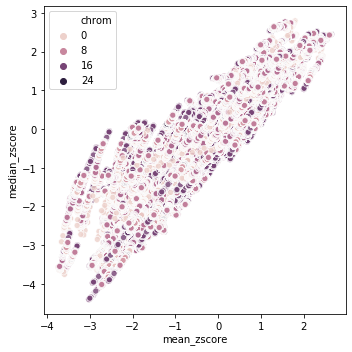

In [51]:
#Z Scores of CNVs sort by Chrom
f, ax = plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(
    ax=ax,
    x='mean_zscore',
    y='median_zscore',
    hue='chrom',
    data=df,
    alpha=0.8
)

f.tight_layout()
f.show()

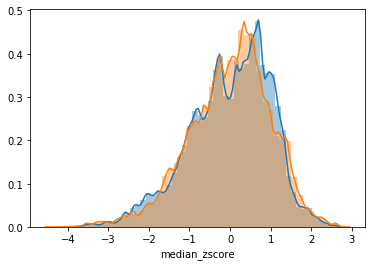

In [52]:
#Mean/Medain Z Score Distribution
sns.distplot(df['mean_zscore'])
sns.distplot(df['median_zscore'])

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


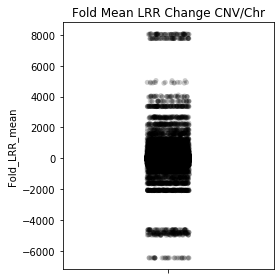

In [26]:
#Fold change (CNV/Chr) of LRR Mean 
f, ax = plt.subplots(1,1,figsize=(4,4))

sns.stripplot(
    y= 'fold_mean',
    ax=ax,
    data=df,
    color='k', # black 
    alpha=0.2, #transparency 
)
ax.set_title('Fold Mean LRR Change CNV/Chr')
ax.set_ylabel('Fold_LRR_mean') # always label your plots
f.tight_layout()
f.show()


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


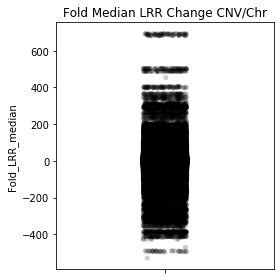

In [27]:
#Fold Change (CNV/Chr) of LRR Median
f, ax = plt.subplots(1,1,figsize=(4,4))

sns.stripplot(
    y= 'fold_median',
    ax=ax,
    data=df,
    color='k', # black 
    alpha=0.2, #transparency 
)
ax.set_title('Fold Median LRR Change CNV/Chr')
ax.set_ylabel('Fold_LRR_median') # always label your plots
f.tight_layout()
f.show()

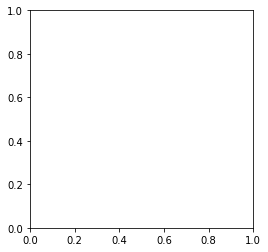

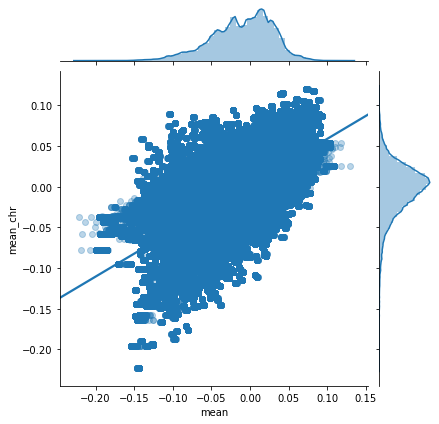

In [56]:
# Mean_CNV vs Mean_chr Jointplot 
f, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.jointplot(
    x='mean', 
    y='mean_chr',  
    data=df, 
    kind="reg",
    joint_kws = {'scatter_kws':dict(alpha=0.3)})
#ax.ax_joint.set_xlabel('nsnp_<30'))


'\nf, ax = plt.subplots(1,1,figsize=(4,4))\nax = sns.scatterplot(\n    x=\'median\', \n    y=\'median_chr\', \n    ax=ax, \n    data=df)\n\n#ax.set_yscale(\'log\')\n#ax.set_xscale(\'log\')\nax.set(ylabel = "median_LRR_chr")\nax.set(xlabel = "median_LRR_cnv")\n'

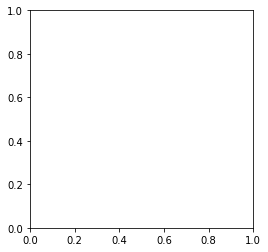

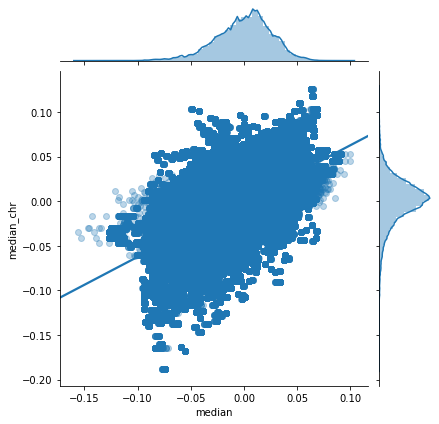

In [58]:
# Median_CNV vs Median_chr Jointplot 
f, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.jointplot(
    x='median', 
    y='median_chr',  
    data=df,
    kind="reg",
    joint_kws = {'scatter_kws':dict(alpha=0.3)})


'''
f, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.scatterplot(
    x='median', 
    y='median_chr', 
    ax=ax, 
    data=df)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylabel = "median_LRR_chr")
ax.set(xlabel = "median_LRR_cnv")
'''

[Text(0.5, 0, 'mean_LRR_cnv')]

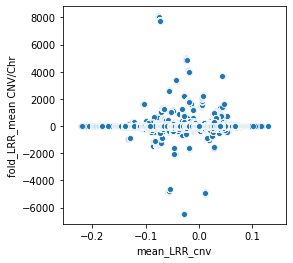

In [24]:
# Mean LRR vs Mean fold change LRR
f, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.scatterplot(
    x='mean', 
    y='fold_mean', 
    ax=ax, 
    data=df)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylabel = "fold_LRR_mean CNV/Chr")
ax.set(xlabel = "mean_LRR_cnv")


[Text(0.5, 0, 'median_LRR_cnv')]

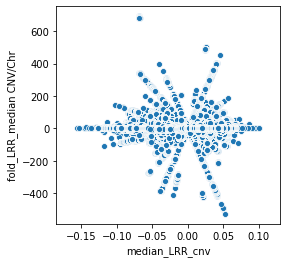

In [25]:
# Median LRR vs Median fold change LRR
f, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.scatterplot(
    x='median', 
    y='fold_median', 
    ax=ax, 
    data=df)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylabel = "fold_LRR_median CNV/Chr")
ax.set(xlabel = "median_LRR_cnv")